Let's start by importing our dependencies

In [30]:
from CalibrationUtils import generateSampleData, plotSolution, plotSolution2D
from HandEyeCalibration import solveHandEyeCalibration, Constraint
import numpy as np

I made a quick utility to generate some artificial measurements:

In [31]:
mode = 'dynamic' # 'static' or 'dynamic'
t_TCP_list, R_TCP_list,t_meas_list, R_meas_list, R_cam, t_cam, R_target, t_target = generateSampleData(n=15, mode = mode, randomness_rotation=10, noise_translation=0.01)

target:
[[-0.4 ]
 [-3.8 ]
 [ 0.54]]
[[ 0.00000000e+00 -9.96194698e-01 -8.71557427e-02]
 [ 0.00000000e+00 -8.71557427e-02  9.96194698e-01]
 [-1.00000000e+00  0.00000000e+00  5.55111512e-17]]
cam:
[[0.1]
 [0.1]
 [0.1]]
[[ 0.         -0.9961947   0.08715574]
 [ 0.9961947   0.00759612  0.08682409]
 [-0.08715574  0.08682409  0.99240388]]


Once we have these measurements we can simply pass them to the calibration utility. By default the quicker sequential approach is used. The initial guess of the camera rotation vector (x0[0:3]) and the target (x0[3:6]) can be passed, but are optional, otherwise the zero vector is used.

In [32]:
sol1 = solveHandEyeCalibration(t_TCP_list, R_TCP_list,t_meas_list, R_meas_list, mode = mode, x0 = [0,0,1,0,0,0])

Solution found.


Great, that worked! Let us do the same thing with the joint approach. The call to the calibration utility is pretty much the same but now with jointly=True. Moreover, we can specify additional constraints of the Constraint class as a list. This is demonstrated below for the camera position and the norm of the camera in the TCP frame.

In [33]:
if mode == 'dynamic':
    quantity = 'camera'
else:
    quantity = 'target'
constraints = [Constraint(quantity,'norm',np.sqrt(3*0.1*0.1)), Constraint(quantity,'position',np.array([[0.1], [0.1], [0.1]]))]
sol2 = solveHandEyeCalibration(t_TCP_list, R_TCP_list,t_meas_list, R_meas_list, jointly=True, mode = mode, x0 = [0,0,1,0,0,0], constraints=constraints)

2 constraints were found.
Solution found.


As you might have noticed, the utility returns a Solution class. It saves some diagnostics for us. We can print the solution as well as the diagnostics with separate methods

In [34]:
sol1.printSolution()
print('========================')
sol2.printSolution()

Camera Translation:
[[0.00161878]
 [0.14237354]
 [0.10272479]]
Camera Rotation:
[[-0.03731292 -0.9892419   0.1414504 ]
 [ 0.99662633 -0.02648373  0.07768249]
 [-0.07310064  0.14387175  0.98689271]]
Target Translation:
[[-0.3353849 ]
 [-3.7598909 ]
 [ 0.57908362]]
Target Rotation:
[[ 0.04145356 -0.98924162 -0.14029478]
 [ 0.02228699 -0.13946504  0.98997616]
 [-0.99889183 -0.04416478  0.0162659 ]]
Camera Translation:
[[0.09691231]
 [0.10314617]
 [0.09763387]]
Camera Rotation:
[[ 0.00756778 -0.99595003  0.08958948]
 [ 0.99657631  0.01488817  0.08132651]
 [-0.08233096  0.08866729  0.99265287]]
Target Translation:
[[-0.39983559]
 [-3.79835023]
 [ 0.52591077]]
Target Rotation:
[[-1.03655979e-03 -9.96122596e-01 -8.79698796e-02]
 [ 1.36338491e-02 -8.79758280e-02  9.96029303e-01]
 [-9.99906517e-01 -1.66924139e-04  1.36721774e-02]]


In [35]:
sol1.printDiagnostics()
print('========================')
sol2.printDiagnostics()

Translation and rotation were solved sequentially.
Time for translation calibration:
0.0
Translation Residual:
0.014054305606530326
Time for rotation calibration:
0.4794342517852783
Rotation Residual:
0.01834576008271615
Translation and rotation were solved jointly with alpha = 1.0.
Time for translation calibration:
0.0
Translation Residual:
0.0017645411643028627
Time for rotation calibration:
0.3807942867279053
Rotation Residual:
0.019627008281647547
Constraint Residual:
[0.         0.00030769]


As we have the ground-truth data we can assess how well the two approaches performed directly

In [36]:
print(sol1.R_cam - R_cam)
print(sol1.t_cam - t_cam)
print('========================')
print(sol2.R_cam - R_cam)
print(sol2.t_cam - t_cam)

[[-0.03731292  0.0069528   0.05429466]
 [ 0.00043163 -0.03407986 -0.0091416 ]
 [ 0.0140551   0.05704766 -0.00551117]]
[[-0.09838122]
 [ 0.04237354]
 [ 0.00272479]]
[[ 0.00756778  0.00024467  0.00243373]
 [ 0.00038161  0.00729205 -0.00549758]
 [ 0.00482478  0.0018432   0.000249  ]]
[[-0.00308769]
 [ 0.00314617]
 [-0.00236613]]


We can also plot the solution in 3D to assess the quality of the solution found and wether there are any outliers

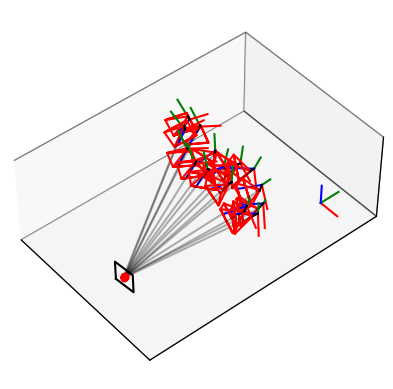

In [37]:
plotSolution(sol2, plotTCPline=False, connectTCP=False, filename='img/solution.png')

Plotting the solution in 2D is also possible, remember, we are looking for the camera position/orientation that minimize the variance of the target

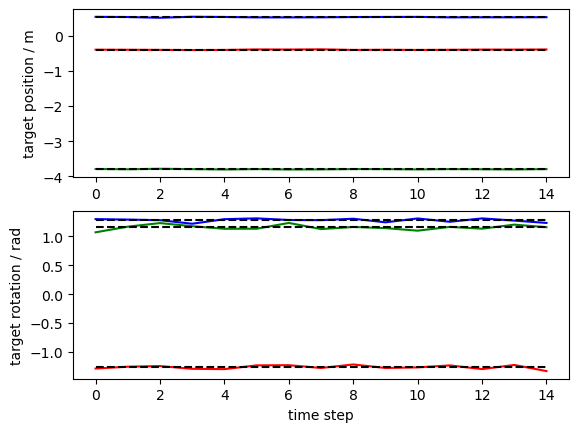

In [38]:
plotSolution2D(sol2, filename='img/solution2D.png')